You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Plot a diagram for the sigmoid function. This is used for binary classi cation. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.
3. Use both one vs all and one vs one method for the above problem statement purpose.
4. Also get results using Log Reg from scikit learn.
5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.



[BONUS]
6. Display few pictures with their predicted and original labels 
7. Do the results differ? State the reasons why it is so.


dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
X = np.load("X.npy") # image
y = np.load("Y.npy") # label

In [5]:
# one hot encoding to normal
y_label = []
for i in y:
    y_label.append(np.argmax(i))
y_label = np.array(y_label)

In [6]:
X_original = X
X = np.reshape(X, (X.shape[0], -1))
X.shape,y.shape

((2062, 4096), (2062, 10))

In [7]:
#appending biasing in the matirx X
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))

In [8]:
#splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 50)

In [9]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1443, 4097) (1443, 10)
(619, 4097) (619, 10)


In [10]:
# def logistic_reg_ova(X_train, y_train, learning_rate = 0.03, no_of_iterations = 100):
m = X_train.shape[0]
#define theta with size 10x4097 and take the initial value as 0
theta = np.zeros((y_train.shape[1],X_train.shape[1]))
learning_rate = 0.03
no_of_iterations = 10000

cost_arr = np.empty((0,y_train.shape[1]))

for i in range(no_of_iterations):

    #model/hypothesis function
    lineq = np.dot(X_train, theta.T)
    # sigmoid function
    h = 1 / (1 + np.exp(-lineq))

    #cost function -1/m * sum (y log h + (1-y)log(1-h)) for each class
    cost = -1/m * ((y_train * np.log(h)) + ((1-y_train) * np.log(1-h)))
    cost = cost.sum(axis = 0)
    cost_arr = np.vstack((cost_arr, cost))

    theta -= (learning_rate/m) * np.dot((h-y_train).T, X_train)


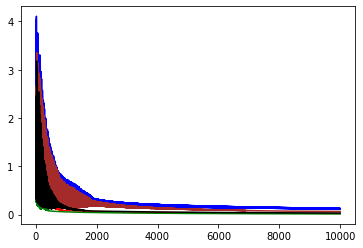

In [11]:
plt.plot(cost_arr[:,0], label='class 0', c='red')
plt.plot(cost_arr[:,1], label='class 1', c='green')
plt.plot(cost_arr[:,2], label='class 2', c='blue')
plt.plot(cost_arr[:,3], label='class 3', c='brown')
plt.plot(cost_arr[:,4], label='class 4', c='black')
plt.show()

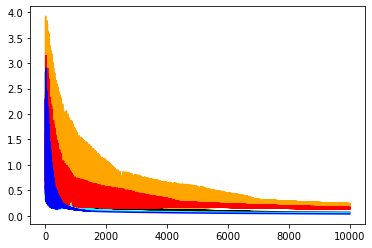

In [12]:

plt.plot(cost_arr[:,5], label='class 5', c='black')
plt.plot(cost_arr[:,6], label='class 7', c='orange')
plt.plot(cost_arr[:,7], label='class 8', c='cyan')
plt.plot(cost_arr[:,8], label='class 9', c='red')
plt.plot(cost_arr[:,9], label='class 10', c='blue')
plt.show()

In [13]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [14]:
#predict 
model_predict = sigmoid(np.dot(X_test, theta.T))


In [15]:
model_predict[0]

array([1.30232243e-06, 5.20951435e-04, 4.38450856e-04, 3.47142500e-01,
       8.13199480e-01, 1.00781565e-06, 4.84691065e-07, 8.63758955e-03,
       8.79414710e-01, 2.06680285e-04])

In [16]:
# one hot encoding to normal. pred stores index of largest element in i which corresponds to class of the data
def one_hot_enc_to_normal(numpyarr):
    pred = []
    for i in numpyarr:
        pred.append(np.argmax(i))
    pred = np.array(pred)
    return pred

In [17]:
pred_labels = one_hot_enc_to_normal(model_predict)

In [18]:
y_test_label = one_hot_enc_to_normal(y_test)


In [19]:
print(y_test_label[:10])
print(pred_labels[:10])
accuracy1 = (pred_labels == y_test_label).mean()
print("accuracy of the model using one vs rest is",accuracy1)

[8 0 5 4 0 4 6 1 0 3]
[8 0 5 8 0 4 3 1 0 3]
accuracy of the model using one vs rest is 0.7641357027463651


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_label, pred_labels)

array([[60,  0,  0,  1,  1,  3,  0,  2,  1,  2],
       [ 4, 52,  0,  2,  3,  3,  1,  0,  0,  0],
       [ 1,  1, 27,  1,  3,  4,  0,  0, 11,  0],
       [ 0,  1,  1, 43,  1,  1,  3,  1,  9,  0],
       [ 0,  0,  0,  0, 49,  1,  0,  0, 15,  0],
       [ 4,  0,  2,  2,  2, 48,  0,  0,  2,  0],
       [ 4,  1,  3, 11,  0,  3, 21,  0,  3,  5],
       [ 0,  0,  1,  0,  2,  1,  0, 62,  4,  1],
       [ 0,  1,  1,  6,  2,  1,  0,  0, 54,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  5,  0, 57]])

In [22]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
y_temp = [np.where(r==1)[0][0] for r in y]
y_temp = np.array(y_temp)
y_temp_train = [np.where(r==1)[0][0] for r in y_train]
y_temp_train = np.array(y_temp_train)
y_temp_test = y_test_label
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_temp_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
sk_predict = lm.predict(X_test)

In [24]:
# model score aka accuracy of our model. y_prediction is made internally
lm.score(X_test, y_temp_test)

0.7576736672051696

array([[58,  0,  0,  1,  1,  4,  2,  2,  0,  2],
       [ 4, 51,  0,  1,  4,  1,  4,  0,  0,  0],
       [ 1,  1, 31,  1,  3,  2,  4,  0,  5,  0],
       [ 0,  1,  3, 39,  1,  1, 10,  1,  4,  0],
       [ 1,  0,  2,  0, 54,  1,  1,  0,  6,  0],
       [ 3,  0,  6,  2,  1, 44,  1,  1,  2,  0],
       [ 0,  0,  5,  8,  0,  1, 36,  0,  0,  1],
       [ 0,  0,  3,  0,  1,  1,  0, 59,  4,  3],
       [ 0,  2,  4,  8,  4,  1,  0,  3, 43,  0],
       [ 3,  0,  0,  0,  0,  0,  3,  4,  0, 54]])

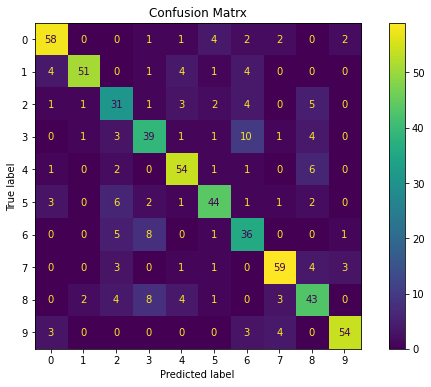

In [25]:
#Creating matplotlib axes object to assign figuresize and figure title
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp = metrics.plot_confusion_matrix(lm, X_test, y_temp_test, ax = ax)
disp.confusion_matrix

In [26]:
#classification report
print(metrics.classification_report(y_temp_test, sk_predict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        70
           1       0.93      0.78      0.85        65
           2       0.57      0.65      0.61        48
           3       0.65      0.65      0.65        60
           4       0.78      0.83      0.81        65
           5       0.79      0.73      0.76        60
           6       0.59      0.71      0.64        51
           7       0.84      0.83      0.84        71
           8       0.67      0.66      0.67        65
           9       0.90      0.84      0.87        64

    accuracy                           0.76       619
   macro avg       0.76      0.75      0.75       619
weighted avg       0.77      0.76      0.76       619



In [28]:
from sklearn.metrics import mean_squared_error, explained_variance_score

print('\nOur Model')
#coefficients
print('Coefficients: {}'.format(theta))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(pred_labels, y_test_label))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % explained_variance_score(y_test_label, pred_labels))
print('Accuracy: {}'.format(accuracy1))


Our Model
Coefficients: [[-0.0221572   0.03278775  0.03665333 ...  0.01022987  0.00530917
   0.00460133]
 [-0.0775638   0.06269735  0.06628614 ... -0.03934033 -0.03834489
  -0.03552179]
 [-0.12920833  0.07111915  0.08070334 ...  0.01054981  0.01199856
   0.00676905]
 ...
 [-0.11489965  0.03187422  0.03528793 ...  0.00925542  0.01715461
   0.01827145]
 [-0.15446163 -0.02860546 -0.02842778 ...  0.06207856  0.07739337
   0.05930979]
 [-0.01830827  0.00759138  0.00327016 ...  0.02167107  0.01822207
   0.01844258]]
Mean squared error: 4.10
Variance score: 0.53
Accuracy: 0.7641357027463651


ValueError: ignored

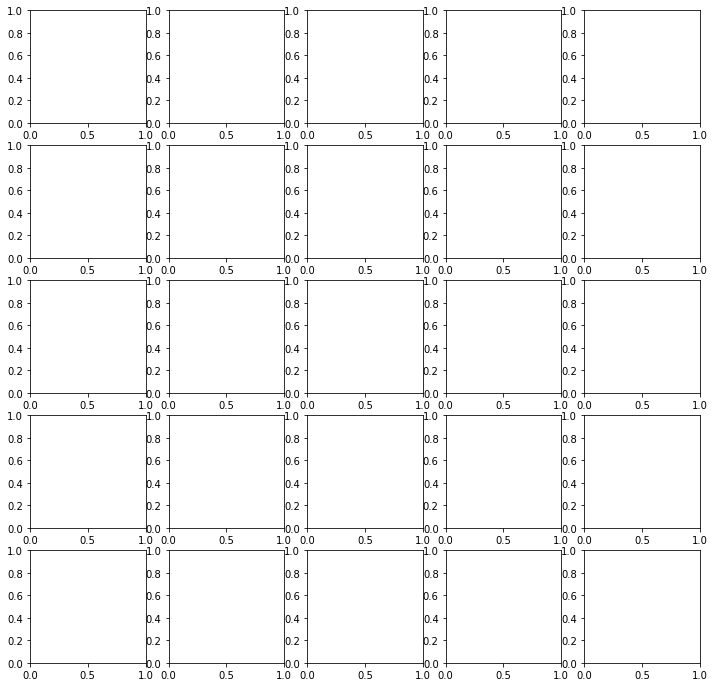

In [31]:
#Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
X_test = X_test[:,1:]
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(64,64))
    axes[i].set_title(f"Prediction Class = {pred_labels[i]:0.1f}\n True Class = {y_test_label[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)